In [18]:

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier

# predictinf chance of cancer model using Decision Tree Classifier
#---> read data , get feats, and label and assign a df

cancer_df = pd.read_csv('/Users/crisramos/Desktop/Deep Learning/data sets/Cancer.csv')
print(cancer_df.columns)                        
feats=['Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses']
X= cancer_df[feats]
y= cancer_df['Malignant_Cancer']

print(cancer_df)                     

Index(['Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Malignant_Cancer'],
      dtype='object')
     Clump_Thickness  Uniformity_of_Cell_Size  Uniformity_of_Cell_Shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
5                  8                       10                        10   
6                  1                        1                         1   
7                  2                        1                         2   
8                  2                        1                   

In [19]:
# part B
# split set test n training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)



In [20]:
#Part C
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

accu_1DT={}

#Decision Tree train and test

my_decisiontree = DecisionTreeClassifier(random_state=2)
my_decisiontree.fit(X_train, y_train)
y_predict_dt = my_decisiontree.predict(X_test)
accu_1DT['accuracy of DT one classifier']=accuracy_score(y_test,y_predict_dt)
#print(y_predict_dt.size)

print(accu_1DT)
from sklearn import metrics

# get prediction probability of model
# and use it to get FPR and TPR. (false posi rate,true posi rate)
# then create AUC ,area under curve.later in part (g)

y_predict_prob = my_decisiontree.predict_proba(X_test)

#print(y_predict_prob)
# make sure positve label is change according to dataset
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,1], pos_label=1)

print(fpr)
print(tpr)

# ****************. AUC  
AUC = metrics.auc(fpr, tpr)
print()
print("AUC for one Decision tree =",AUC)

{'accuracy of DT one classifier': 0.8666666666666667}
[0.         0.11764706 1.        ]
[0.         0.85714286 1.        ]

AUC for one Decision tree = 0.8697478991596639


In [21]:
#part D

#print(cancer_df.size)
from collections import Counter 

from sklearn.utils import resample
from sklearn.ensemble import VotingClassifier

# helper methods to extract the majority votes and compare-->

def get_column(array, col):
  result = []
  for row in array:
    result.append(row[col])
  return result
def majority(arr): 
  
    # convert array into dictionary 
    freqDict = Counter(arr) 
  
    # traverse dictionary and check majority element 
    size = len(arr) 
    for (key,val) in freqDict.items(): 
         if (val > (size/2)): 
             #print(key) 
             return key
    
print()  

results_Base=[]

# performing Bagging--->
#print(len(X_train))
for i in range(29):
    bootstarp_size = int(0.8*len(X_train))
    x_bag,y_bag = resample(X_train,y_train, n_samples= bootstarp_size , random_state=i , replace = True)
    Base_DecisionTree = DecisionTreeClassifier(random_state=2)
    Base_DecisionTree.fit(x_bag,y_bag)
    predi=np.array(Base_DecisionTree.predict(X_test))
    #print(predi.size)
    results_Base.append(np.array( predi))

final_voting=[]    
#-------------
# going through each column to find the majority of votes 
# append the majority 1 or 0 for each data sample

#print(results_Base) #29 decision arrays--
final_voting=[]    

# going through each column to find the majority of votes 
# append the majority 1 or 0 for each data sample
proba29=[]

for i in range(45): # 45 predictions---
    final_voting.append(majority(get_column(results_Base,i)))
    #print(i,final_voting[i])
    sumForProb=((get_column(results_Base,i))==final_voting[i]).sum()
    #print(sumForProb)
    if(final_voting[i]==0):
        sumForProb=29-sumForProb
        
    proba29.append(sumForProb/29)
#print(get_column(results_Base,0))
print()
print('probabilities= ',proba29)
print()
print(' **Final voting from 29 models =',final_voting)
print()
accuracy_29={}
# compare the results from the votes to the test
accuracy_29['accuracy of Decison Trees Voting']=accuracy_score(y_test,final_voting)
print(accuracy_29)
print()
proba29= np.array(proba29)
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, proba29, pos_label=1)

print(fpr1)
print(tpr1)

# ****************. AUC  
AUC1 = metrics.auc(fpr1, tpr1)
print()
print("AUC x29Trees is =",AUC1)



probabilities=  [0.06896551724137931, 1.0, 1.0, 0.8620689655172413, 0.7931034482758621, 1.0, 0.896551724137931, 0.8620689655172413, 0.0, 0.3793103448275862, 0.9655172413793104, 0.9655172413793104, 1.0, 1.0, 0.6551724137931034, 0.5862068965517241, 0.0, 0.6551724137931034, 0.0, 0.7931034482758621, 0.0, 0.0, 0.0, 0.3793103448275862, 0.5517241379310345, 1.0, 0.034482758620689655, 0.0, 0.0, 0.7931034482758621, 0.0, 1.0, 1.0, 0.0, 0.9310344827586207, 0.4482758620689655, 0.5517241379310345, 0.6206896551724138, 0.9310344827586207, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0]

 **Final voting from 29 models = [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1]

{'accuracy of Decison Trees Voting': 0.9111111111111111}

[0.         0.05882353 0.05882353 0.05882353 0.05882353 0.05882353
 0.11764706 0.11764706 0.11764706 0.11764706 0.17647059 0.29411765
 1.        ]
[0.         0.39285714 0.53571429 0.57142857 0.64285714 0.75
 0

In [22]:
#part E

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

accuracy={}
my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)
my_AdaBoost.fit(X_train,y_train)
boost_predict= my_AdaBoost.predict(X_test)
#print(boost_predict)
#print(y_test)
accuracy['accuracy of Ada Boost']=accuracy_score(y_test,boost_predict)
print(accuracy)


adadBoost_proba = my_AdaBoost.predict_proba(X_test)


# make sure positve label is change according to dataset
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, adadBoost_proba[:,1], pos_label=1)

print(fpr2)
print(tpr2)

# ****************. AUC  
AUC2 = metrics.auc(fpr2, tpr2)
print()
print("AUC for ADA Boost is =",AUC2)



{'accuracy of Ada Boost': 0.9555555555555556}
[0.         0.         0.         0.         0.         0.
 0.05882353 0.05882353 0.11764706 0.11764706 0.35294118 0.52941176
 1.        ]
[0.03571429 0.10714286 0.21428571 0.25       0.35714286 0.42857143
 0.46428571 0.96428571 0.96428571 1.         1.         1.
 1.        ]

AUC for ADA Boost is = 0.9653361344537815


In [23]:
#part F

from xgboost import XGBClassifier

my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)

my_XGBoost.fit(X_train, y_train)
XG_pre = my_XGBoost.predict(X_test)

accuracyXG={}
accuracyXG['accuracy of XGBoost']=accuracy_score(y_test,XG_pre)
print(accuracyXG)


XG_proba = my_XGBoost.predict_proba(X_test)


# make sure positve label is change according to dataset
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test, XG_proba[:,1], pos_label=1)
print()
print(fpr3)
print(tpr3)

# ****************. AUC  
AUC3 = metrics.auc(fpr3, tpr3)
print()
print("AUC  for XG Boost =",AUC3)




#---------------------------------------------------------------


{'accuracy of XGBoost': 0.9555555555555556}

[0.         0.         0.         0.05882353 0.05882353 0.05882353
 0.05882353 0.11764706 0.11764706 0.23529412 0.41176471 0.52941176
 1.        ]
[0.17857143 0.25       0.35714286 0.42857143 0.5        0.64285714
 0.96428571 0.96428571 1.         1.         1.         1.
 1.        ]

AUC  for XG Boost = 0.9621848739495799


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [24]:
# Part G

from sklearn.ensemble import RandomForestClassifier
my_RandomForest =RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)



my_RandomForest.fit(X_train, y_train)
RF_pre = my_RandomForest.predict(X_test)
accuracyRF={}
accuracyRF['accuracy of Random Forest']=accuracy_score(y_test,RF_pre)
print(accuracyRF)


RF_proba = my_RandomForest.predict_proba(X_test)


# make sure positve label is change according to dataset
fpr4, tpr4, thresholds4 = metrics.roc_curve(y_test, RF_proba[:,1], pos_label=1)
print()
print(fpr4)
print(tpr4)

# ****************. AUC  
AUC4 = metrics.auc(fpr4, tpr4)
print()
print("AUC  for Random Forest =",AUC4)





{'accuracy of Random Forest': 0.9555555555555556}

[0.         0.05882353 0.05882353 0.05882353 0.05882353 0.05882353
 0.05882353 0.29411765 1.        ]
[0.         0.35714286 0.60714286 0.67857143 0.71428571 0.92857143
 1.         1.         1.        ]

AUC  for Random Forest = 0.9516806722689075


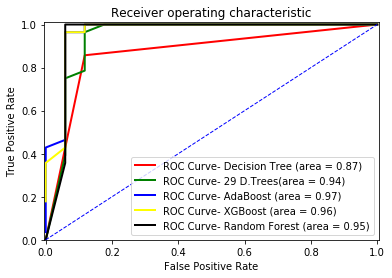

In [25]:
# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
#part H
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()

# Roc Curve1:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve- Decision Tree (area = %0.2f)' % AUC)

# Roc Curve2:
plt.plot(fpr1, tpr1, color='green', lw=2, 
         label='ROC Curve- 29 D.Trees(area = %0.2f)' % AUC1)
# Roc Curve3:
plt.plot(fpr2, tpr2, color='blue', lw=2, 
         label='ROC Curve- AdaBoost (area = %0.2f)' % AUC2)

# Roc Curve4:
plt.plot(fpr3, tpr3, color='yellow', lw=2, 
         label='ROC Curve- XGBoost (area = %0.2f)' % AUC3)

# Roc Curve5:
plt.plot(fpr4, tpr4, color='black', lw=2, 
         label='ROC Curve- Random Forest (area = %0.2f)' % AUC4)



# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()